In [68]:
import numpy as np
import matplotlib.pyplot as plt

## Energy VS angle

In [6]:
angle = np.arange(0, 185, 5)

In [38]:
energy = np.array([2.804, 2.802, 2.798, 2.792, 2.782, 2.770, 2.756, 2.740, 2.721, 2.701,
                 2.679, 2.655, 2.631, 2.605, 2.578, 2.551, 2.523, 2.496, 2.468, 2.441, 
                 2.414, 2.388, 2.363, 2.339, 2.316, 2.294, 2.274, 2.255, 2.239, 2.224,
                 2.21, 2.199, 2.190, 2.182, 2.177, 2.174, 2.173])

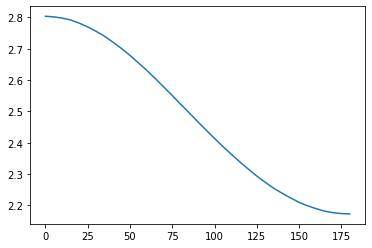

In [39]:
plt.plot(angle, energy)

In [89]:
fit_coeff = np.polyfit(angle, energy, 4)
fit_coeff

array([-3.76446665e-10,  3.75645182e-07, -7.76735734e-05,  5.23749916e-04,
        2.80130909e+00])

In [45]:
fit_result = fit_coeff[0] * angle**4 + fit_coeff[1] * angle**3 + fit_coeff[2] * angle**2 + fit_coeff[3] * angle + fit_coeff[4]

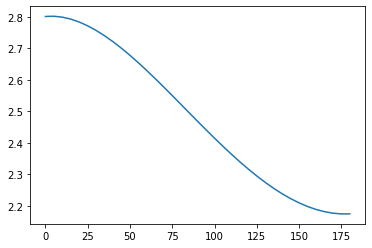

In [46]:
plt.plot(angle, fit_result)

## Cross section VS angle

In [22]:
legendre_coeff = np.array([0.692, 0.304, 0.004])

In [32]:
from scipy.special import legendre

In [48]:
legendre(0)

poly1d([1.])

In [49]:
legendre(2)

poly1d([ 1.5,  0. , -0.5])

In [52]:
legendre(4)

poly1d([ 4.37500000e+00,  4.85722573e-16, -3.75000000e+00,  2.42861287e-16,
        3.75000000e-01])

In [73]:
cos = np.cos(np.radians(angle))

In [70]:
legendre_result = (legendre_coeff[0] + 
                   legendre_coeff[1] * (legendre(2)[0] * cos**2 + legendre(2)[2]) + 
                   legendre_coeff[2] * (legendre(4)[0] * cos**4 + legendre(4)[1] * cos**3 + legendre(4)[2] * cos**2 + legendre(4)[3] * cos + legendre(4)[4]))

In [75]:
legendre_result

array([1.        , 1.00124585, 1.00494657, 1.01099265, 1.01920488,
       1.02933927, 1.04109375, 1.0541167 , 1.06801692, 1.082375  ,
       1.09675569, 1.11072103, 1.12384375, 1.13572062, 1.14598524,
       1.15431985, 1.1604657 , 1.16423153, 1.1655    , 1.16423153,
       1.1604657 , 1.15431985, 1.14598524, 1.13572062, 1.12384375,
       1.11072103, 1.09675569, 1.082375  , 1.06801692, 1.0541167 ,
       1.04109375, 1.02933927, 1.01920488, 1.01099265, 1.00494657,
       1.00124585, 1.        ])

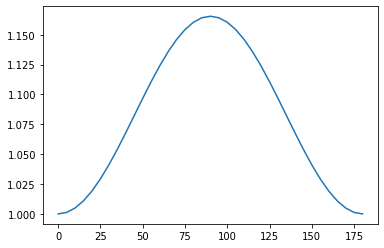

In [71]:
plt.plot(angle, legendre_result)

### approximation and normalization

In [80]:
coeff = np.polyfit(angle, legendre_result, 5)
coeff

array([-2.05997666e-25,  3.15723625e-09, -1.13660505e-06,  1.08130542e-04,
       -1.05049564e-03,  1.00347848e+00])

In [81]:
approximated = coeff[0] * angle**5 + coeff[1] * angle**4 + coeff[2] * angle**3 + coeff[3] * angle**2 + coeff[4] * angle + coeff[5]

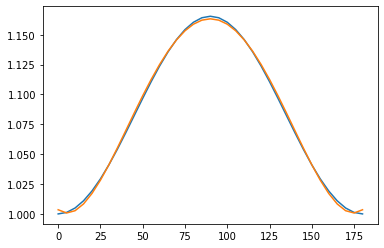

In [83]:
plt.plot(angle, legendre_result)
plt.plot(angle, approximated)

In [84]:
normalization = np.sum(approximated) * 5

In [86]:
coeff_final = coeff / normalization
coeff_final

array([-1.03070338e-27,  1.57971405e-11, -5.68697059e-09,  5.41028046e-07,
       -5.25612462e-06,  5.02087564e-03])

In [87]:
approximated_final = approximated / normalization

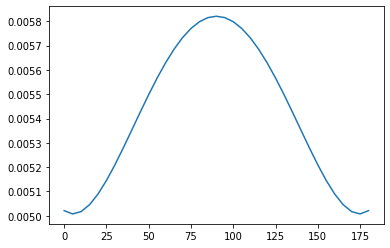

In [88]:
plt.plot(angle, approximated_final)

### To get the CDF

In [94]:
legendre_final = legendre_result / (legendre_result.sum())

In [95]:
cummulative = np.array([legendre_final[:i].sum() for i in range(37)])

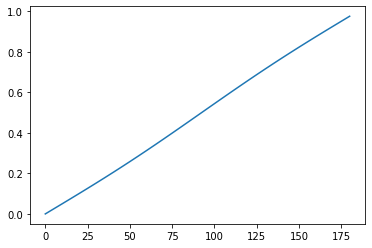

In [96]:
plt.plot(angle, cummulative)

In [103]:
cdf_coeff = np.polyfit(angle, cummulative, 3)
cdf_coeff

array([-4.55564278e-08,  1.25782970e-05,  4.60832782e-03,  2.27093768e-03])

In [101]:
cdf_fit = cdf_coeff[0] * angle**3 + cdf_coeff[1] * angle**2 + cdf_coeff[2] * angle + cdf_coeff[3]

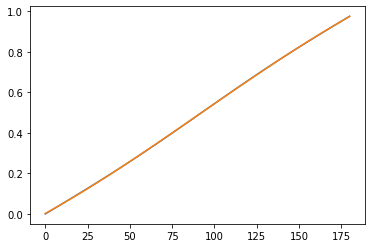

In [102]:
plt.plot(angle, cummulative)
plt.plot(angle, cdf_fit)

Looks fine.